# Simulación del calentador eléctrico con resistencia de NICROM

Este notebook simula el comportamiento del calentador de agua utilizando una resistencia de NICROM (aleación de Níquel y Cromo).

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Parámetros del Calentador

In [8]:
# Definición de parámetros
VOLTAJE = 12.0                # Voltios (V)
RESISTENCIA = 0.23            # Ohms (Ω)
VOLUMEN_AGUA = 0.75           # Litros (L)
DENSIDAD_AGUA = 1.0           # kg/L
CALOR_ESPECIFICO_AGUA = 4180  # J/(kg·°C)
TEMP_INICIAL = 20.0           # °C
TEMP_AMBIENTE = 20.0          # °C
TEMP_OBJETIVO = 80.0          # °C (para el mate)
TIEMPO_DESEADO = 300          # segundos (5 minutos)

# Cálculos derivados
POTENCIA = VOLTAJE**2 / RESISTENCIA   # Watts (W) o Joules/segundo (J/s)
MASA_AGUA = VOLUMEN_AGUA * DENSIDAD_AGUA  # kg
ENERGIA_TOTAL_NECESARIA = MASA_AGUA * CALOR_ESPECIFICO_AGUA * (TEMP_OBJETIVO - TEMP_INICIAL)  # Joules

## Resultados iniciales

In [9]:
# Mostrar valores calculados
print(f"--- Parámetros del Calentador ---")
print(f"Voltaje: {VOLTAJE} V")
print(f"Resistencia: {RESISTENCIA} Ω")
print(f"Potencia Calculada: {POTENCIA:.2f} W")
print(f"Corriente (I = V/R): {VOLTAJE/RESISTENCIA:.2f} A")
print(f"Volumen de Agua: {VOLUMEN_AGUA} L ({MASA_AGUA} kg)")
print(f"Temperatura Inicial: {TEMP_INICIAL} °C")
print(f"Temperatura Objetivo: {TEMP_OBJETIVO} °C")
print(f"Tiempo deseado: {TIEMPO_DESEADO} segundos ({TIEMPO_DESEADO/60:.1f} minutos)")
print(f"Energía total necesaria: {ENERGIA_TOTAL_NECESARIA:.2f} J")

--- Parámetros del Calentador ---
Voltaje: 12.0 V
Resistencia: 0.23 Ω
Potencia Calculada: 626.09 W
Corriente (I = V/R): 52.17 A
Volumen de Agua: 0.75 L (0.75 kg)
Temperatura Inicial: 20.0 °C
Temperatura Objetivo: 80.0 °C
Tiempo deseado: 300 segundos (5.0 minutos)
Energía total necesaria: 188100.00 J


## Simulación del Calentamiento (sin pérdidas de calor)

In [10]:
# Parámetros de simulación
tiempo_total_simulacion = TIEMPO_DESEADO * 1.2  # Simulamos un 20% más del tiempo deseado
dt = 1.0  # Paso de tiempo en segundos
numero_pasos = int(tiempo_total_simulacion / dt)

# Inicialización
tiempo = np.zeros(numero_pasos + 1)
temperatura = np.zeros(numero_pasos + 1)
temperatura[0] = TEMP_INICIAL

# Simulación sin pérdidas de calor
tiempo_objetivo_alcanzado = -1

for i in range(numero_pasos):
    # Calcular energía añadida en este paso de tiempo
    energia_paso = POTENCIA * dt
    
    # Calcular aumento de temperatura
    delta_T = energia_paso / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
    
    # Actualizar temperatura y tiempo
    temperatura[i+1] = temperatura[i] + delta_T
    tiempo[i+1] = tiempo[i] + dt
    
    # Registrar cuándo se alcanza la temperatura objetivo
    if temperatura[i+1] >= TEMP_OBJETIVO and tiempo_objetivo_alcanzado < 0:
        tiempo_objetivo_alcanzado = tiempo[i+1]
        
    # Detener si la temperatura se dispara (verificación de seguridad)
    if temperatura[i+1] > 100:
        print(f"Advertencia: Temperatura > 100°C en t={tiempo[i+1]:.1f}s. Deteniendo simulación.")
        tiempo = tiempo[:i+2]
        temperatura = temperatura[:i+2]
        break

## Análisis de Resultados

In [11]:
# Resultados del primer segundo
delta_T_1s = POTENCIA * 1.0 / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
print(f"\n--- Resultados de la Simulación (sin pérdidas) ---")
print(f"Aumento de Temperatura en el primer segundo: {delta_T_1s:.4f} °C")

if tiempo_objetivo_alcanzado > 0:
    print(f"Tiempo para alcanzar {TEMP_OBJETIVO}°C: {tiempo_objetivo_alcanzado:.1f} s ({tiempo_objetivo_alcanzado/60:.1f} min)")
else:
    print(f"La temperatura objetivo de {TEMP_OBJETIVO}°C no se alcanzó en {tiempo_total_simulacion/60:.1f} minutos.")
    print(f"Temperatura máxima alcanzada: {np.max(temperatura):.2f} °C")


--- Resultados de la Simulación (sin pérdidas) ---
Aumento de Temperatura en el primer segundo: 0.1997 °C
Tiempo para alcanzar 80.0°C: 301.0 s (5.0 min)


## Gráfico de Calentamiento

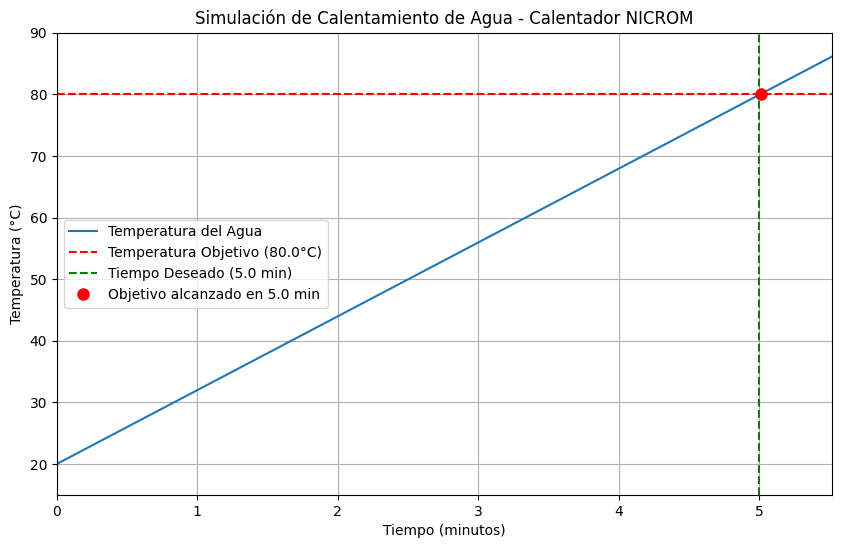

In [13]:
# Gráfico de Calentamiento
plt.figure(figsize=(10, 6))
plt.plot(tiempo / 60, temperatura, label='Temperatura del Agua')  # Tiempo en minutos
plt.axhline(y=TEMP_OBJETIVO, color='r', linestyle='--', label=f'Temperatura Objetivo ({TEMP_OBJETIVO}°C)')
plt.axvline(x=TIEMPO_DESEADO/60, color='g', linestyle='--', label=f'Tiempo Deseado ({TIEMPO_DESEADO/60:.1f} min)')

# Si se alcanzó la temperatura objetivo, marcar el punto
if tiempo_objetivo_alcanzado > 0:
    plt.plot(tiempo_objetivo_alcanzado/60, TEMP_OBJETIVO, 'ro', markersize=8, 
             label=f'Objetivo alcanzado en {tiempo_objetivo_alcanzado/60:.1f} min')

plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Simulación de Calentamiento de Agua - Calentador NICROM')
plt.legend()
plt.grid(True)

# Ajustar límites del gráfico
if tiempo_objetivo_alcanzado > 0:
    plt.xlim(0, (tiempo_objetivo_alcanzado*1.1)/60)  # Mostrar un poco más allá del objetivo
else:
    plt.xlim(0, tiempo_total_simulacion/60)
    
plt.ylim(TEMP_INICIAL - 5, TEMP_OBJETIVO + 10)
plt.show()